## Estudio de StreetMap

En este jupyter se mostraré como usar StreetMap, que es una API que permite obtener datos de negocios en base a una ubicación geográfica.

In [2]:
%pip install overpy

  Using cached overpy-0.7-py3-none-any.whl.metadata (3.5 kB)
Using cached overpy-0.7-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install h3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.4/989.4 kB 23.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
%pip install folium

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached xyzservices-2025.4.0-py3-none-any.whl.metadata (4.3 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached xyzservices-2025.4.0-py3-none-any.whl (90 kB)
Note: you may need to restart the kernel to use updated packages.


In [86]:
%pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached contourpy-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (321 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may ne

In [45]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


**Python Version**

La version de python debe ser mayor a 3.6.

**Librerias**

In [5]:
import overpy
import h3
import pandas as pd
import folium

**Latitud & Longitud**

In [6]:
lat = -33.42827732181414 #metro manuel montt
lon = -70.6191295337284 #metro manuel montt
distancia = 1000
resolucion = 7

In [7]:
import folium

# Center the map on Santiago, Chile
map_santiago = folium.Map(location=[lat, lon], zoom_start=15)

# Add a circle marker
folium.CircleMarker(
    location=[lat, lon],
    radius=10,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.6
).add_to(map_santiago)

# Show the map in Jupyter or save it
map_santiago

**H3**

H3 es una indexacion geoespacial hecha por Uber que divide el planeta en hexagonos, los cuales fue construido para determinar el costo de viaje en Uber, mapeo entre los riders y drivers, etc.

Cada hexagono tiene un identificador única que puede ser usado para localizar un punto en el mapa.

Para mas detalles, ver: https://h3geo.org/

Adicionalmente, Uber define resoluciones de hexagonos para su operación, desde el 0 hasta 15. A medida que la resolucion aumenta, el planeta se divide en más hexagonos (tiene menor area cada hexagono), lo que permite un mayor detalle en el análisis.  La tabla de resoluciones es la siguiente:

| Res | Total number of cells     | Number of hexagons          | Number of pentagons |
|-----|---------------------------|-----------------------------|---------------------|
| 0   | 122                       | 110                         | 12                  |
| 1   | 842                       | 830                         | 12                  |
| 2   | 5,882                     | 5,870                       | 12                  |
| 3   | 41,162                    | 41,150                      | 12                  |
| 4   | 288,122                   | 288,110                     | 12                  |
| 5   | 2,016,842                 | 2,016,830                   | 12                  |
| 6   | 14,117,882                | 14,117,870                  | 12                  |
| 7   | 98,825,162                | 98,825,150                  | 12                  |
| 8   | 691,776,122               | 691,776,110                 | 12                  |
| 9   | 4,842,432,842             | 4,842,432,830               | 12                  |
| 10  | 33,897,029,882            | 33,897,029,870              | 12                  |
| 11  | 237,279,209,162           | 237,279,209,150             | 12                  |
| 12  | 1,660,954,464,122         | 1,660,954,464,110           | 12                  |
| 13  | 11,626,681,248,842        | 11,626,681,248,830          | 12                  |
| 14  | 81,386,768,741,882        | 81,386,768,741,870          | 12                  |
| 15  | 569,707,381,193,162       | 569,707,381,193,150         | 12                  |


A continuación, se muestra un ejemplo de cómo se pueden dibujar hexágonos en un mapa de folium, con un resolución de 7 y 8.

In [8]:
import folium
import h3

# Example lat/lon

# Create Folium map centered on the location
m = folium.Map(location=[lat, lon], zoom_start=13)

# Loop through desired resolutions
for res, color in [(7, 'blue'), (8, 'red')]:
    cell = h3.latlng_to_cell(lat, lon, res)
    boundary = h3.cell_to_boundary(cell)

    # Draw hexagon polygon
    folium.Polygon(
        locations=[(lat, lon) for lat, lon in boundary],
        color=color,
        weight=2,
        fill=True,
        fill_opacity=0.2,
        popup=f"Resolution {res}"
    ).add_to(m)

# Add center marker
center = h3.cell_to_latlng(h3.latlng_to_cell(lat, lon, 7))
folium.Marker(location=center, popup="Hexagon Center").add_to(m)

# Display map
m



**¿Cómo localizar un punto?**

Si volvemos al inicio, tenemos el metro manuel montt, pero quisiera saber que hay cercano a este metro, entonces podemos usar la api de overpass, localizando este punto en un hexagono de h3 (uber), y buscando los lugares cercanos a este hexagono, basado en una distancia. La distancia es radial, por lo que, no es estrictamente una distancia real (calles),

In [9]:
cell = h3.latlng_to_cell(lat, lon, resolucion)
center_cell = h3.cell_to_latlng(cell)

input_df = pd.DataFrame({"lat": [center_cell[0]], "lon": [center_cell[1]]})
input_latlons = ",".join(input_df.to_numpy().flatten().astype("str"))

In [10]:
api = overpy.Overpass()

overpass_query = f"""
[out:json][timeout:500];
(
  nwr["amenity"](around:{distancia},{input_latlons});
  (._;>;);
);
out center;
"""

result = api.query(overpass_query)

In [11]:
result = api.query(overpass_query)
result_df = pd.json_normalize(map(vars, result.nodes)) \
            .drop(columns=["_result"]) \
            .rename(columns={"tags.name": "name"}) \
            .dropna(subset=['name']) \
            .reset_index(drop=True)

# Normalize result to DataFrame
result_df


,id,lat,lon,tags.source,tags.addr:city,tags.addr:country,tags.addr:full,tags.addr:housenumber,tags.addr:street,tags.amenity,...,tags.self_service,tags.community_centre:for,tags.lgbtq,tags.email,tags.contact:instagram,tags.maxheight,tags.recycling:cans,tags.recycling:glass_bottles,tags.recycling:paper,tags.drinking_water
0,451504554,-33.4305256,-70.6226193,NaN,Providencia,CL,"Avenida Providencia 1049, Providencia, Santiag...",1049,Avenida Providencia,fast_food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,526310732,-33.4348536,-70.6277132,NaN,NaN,NaN,NaN,NaN,NaN,bank,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,526310734,-33.4355831,-70.6293607,NaN,NaN,NaN,NaN,349,Avenida Providencia,cafe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575438880,-33.4297073,-70.6226387,NaN,NaN,NaN,NaN,NaN,NaN,nightclub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,582075196,-33.4303355,-70.6223248,NaN,Providencia,CL,"Avenida Providencia 1069, Providencia, Santiag...",1069,Avenida Providencia,pub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,12423424501,-33.4351109,-70.6274544,NaN,NaN,NaN,NaN,455,Avenida Providencia,bar,...,NaN,NaN,NaN,NaN,restobarcalabria.cl,NaN,NaN,NaN,NaN,NaN
248,12528300523,-33.4306894,-70.6224720,NaN,NaN,NaN,NaN,NaN,Roman Diaz,fast_food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,12528309116,-33.4306071,-70.6225523,NaN,NaN,NaN,NaN,NaN,NaN,restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,12784694144,-33.4332571,-70.6254797,NaN,Providencia,NaN,NaN,NaN,General Salvo,ice_cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import folium
import pandas as pd
import matplotlib.colors as mcolors

m = folium.Map(location=[result_df['lat'].mean(), result_df['lon'].mean()], zoom_start=15)

unique_amenities = result_df['tags.amenity'].dropna().unique()
colors = list(mcolors.TABLEAU_COLORS.values())  # Use actual color values
color_map = {amenity: colors[i % len(colors)] for i, amenity in enumerate(unique_amenities)}

for _, row in result_df.iterrows():
    amenity = row['tags.amenity']
    name = row.get('name', 'Unnamed')
    color = color_map.get(amenity, 'gray')  # Assign color based on amenity
    
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"<b>{name}</b><br>{amenity}"
    ).add_to(m)

legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: auto; 
     z-index:9999; background-color:white; 
     border:2px solid grey; padding: 10px; font-size:14px;">
     <b>Amenities Legend</b><br>
"""
for amenity, color in color_map.items():
    legend_html += f'<i style="background:{color};width:12px;height:12px;display:inline-block;margin-right:5px;"></i>{amenity}<br>'
legend_html += "</div>"

m.get_root().html.add_child(folium.Element(legend_html))

m


Si lo hacemos de esta manera, solo estamos obteniendo solo los lugares que estan en el hexagono de h3, y no lo de otros hexagonos cercanos.

Debido a esto, usaremos directamente el punto de referencia para encontrar los lugares cercanos, más que los hexagonos de h3.

**Punto de referencia**

In [ ]:
def get_amenities_from_point(lat, lon, distancia):
    
    api = overpy.Overpass()
    ##    
    input_df = pd.DataFrame({"lat": [lat], "lon": [lon]})
    input_latlons = ",".join(input_df.to_numpy().flatten().astype("str"))
    
    overpass_query = f"""
    [out:json][timeout:500];
    (
    nwr["amenity"](around:{distancia},{input_latlons});
    (._;>;);
    );
    out center;
    """

    result = api.query(overpass_query)
    result_df = pd.json_normalize(map(vars, result.nodes)) \
                .drop(columns=["_result"]) \
                .rename(columns={"tags.name": "name"}) \
                .dropna(subset=['name']) \
                .reset_index(drop=True)
    
    # Normalize result to DataFrame
    return result_df

lat = -33.42827732181414 #metro manuel montt
lon = -70.6191295337284 #metro manuel montt
distancia = 1000
result_df = get_amenities_from_point(lat, lon, distancia)


In [ ]:
lat = -33.42827732181414 #metro manuel montt
lon = -70.6191295337284 #metro manuel montt
distancia = 1000
result_df = get_amenities_from_point(lat, lon, distancia)

In [35]:
import folium
import pandas as pd
import matplotlib.colors as mcolors

m = folium.Map(location=[result_df['lat'].mean(), result_df['lon'].mean()], zoom_start=15)

unique_amenities = result_df['tags.amenity'].dropna().unique()
colors = list(mcolors.TABLEAU_COLORS.values())  # Use actual color values
color_map = {amenity: colors[i % len(colors)] for i, amenity in enumerate(unique_amenities)}

for _, row in result_df.iterrows():
    amenity = row['tags.amenity']
    name = row.get('name', 'Unnamed')
    color = color_map.get(amenity, 'gray')  # Assign color based on amenity
    
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"<b>{name}</b><br>{amenity}"
    ).add_to(m)

legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: auto; 
     z-index:9999; background-color:white; 
     border:2px solid grey; padding: 10px; font-size:14px;">
     <b>Amenities Legend</b><br>
"""
for amenity, color in color_map.items():
    legend_html += f'<i style="background:{color};width:12px;height:12px;display:inline-block;margin-right:5px;"></i>{amenity}<br>'
legend_html += "</div>"


folium.CircleMarker(
        location=[lat, lon],
        radius=20,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1,
        popup=f"<b>{name}</b><br>{amenity}"
    ).add_to(m)

m.get_root().html.add_child(folium.Element(legend_html))

m

/tmp/ipykernel_19420/1804889802.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


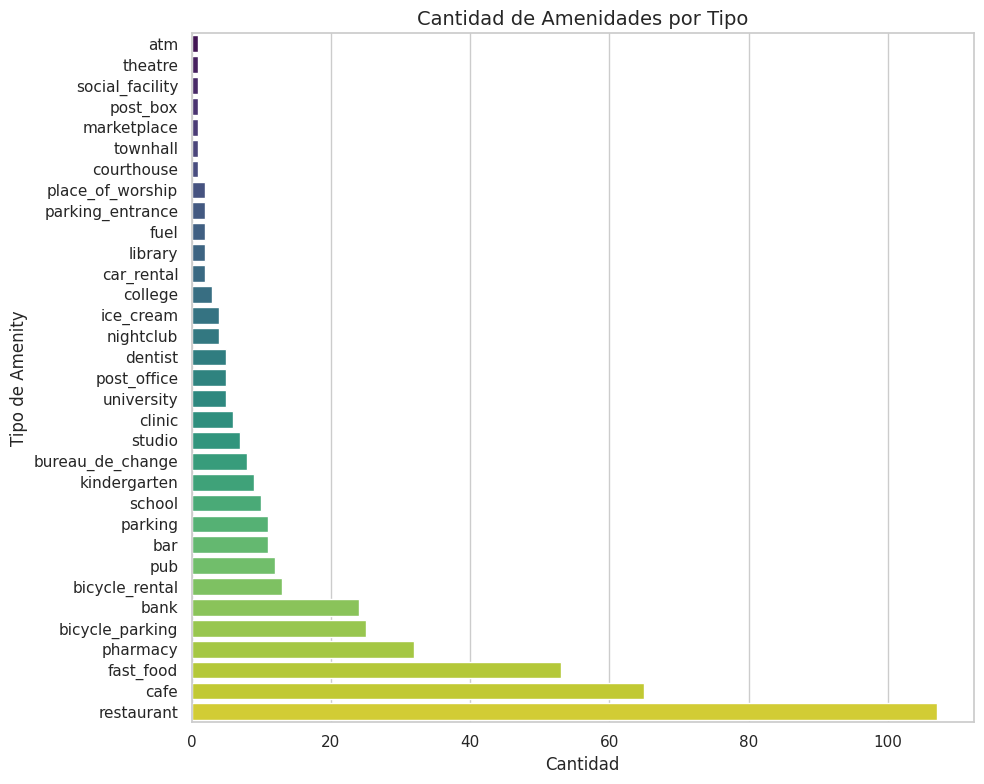

In [46]:

import matplotlib.pyplot as plt
import seaborn as sns

# Sort and prepare data
amenities_df = result_df.groupby('tags.amenity').size().reset_index(name='count')
amenities_df = amenities_df.sort_values(by='count', ascending=True)  # ascending for horizontal bars

# Set plot style
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Horizontal bar plot
sns.barplot(
    data=amenities_df,
    x='count',
    y='tags.amenity',
    palette='viridis'
)

# Add labels
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Amenity")
plt.title("Cantidad de Amenidades por Tipo", fontsize=14)
plt.tight_layout()

plt.show()



**¿En que se puede utilizar?**

La plusvalia de una departamento o una casa no solo depende de los metros cuadrados, los baños o dormitorios, sino que también depende de los servicios que se ofrezcan. Las amenidades son todos los servicios que estan afuera de tu casa o departamento y que son cruciales para que la persona que compra el departamento o casa. Saber este tipo de cosas, puede ayudar tanto a hacer un analisis de mercado, como a predecir el precio de un departamento o casa.